# Week 4 - The Finite-Difference Method in 2D - Numerical Anisotropy, Heterogeneous Media

This week we are going to look at the two-dimensional wave equation.
But to see beneath the ordinary and be able to spot the peculiarities,
we are going to start looking at the full three-dimensional wave equation

\begin{equation}
    \partial_t^2p(\mathbf{R},t) = c^2(\mathbf{R})\nabla^2p(\mathbf{R},t) + s(\mathbf{R},t)\,,
\end{equation}
where $\mathbf{R} = (x,y,z)$ is the three-dimensional wavevector.

The way to get rid of one of the dimensions is saying that, for instance,
the equation does not dependon the direction $y$ and consequently all
the derivatives with respect to the latter are zero. Despite of making it easier,
when one talks about the source point, it turns out to be a little bit trickier.
Because when one says that the system does not depend on $y$, it means that
the system is symmetric with respect to spatial translation along the $y$
direction. Therefore, for the source, it can not be a point source, it must
be a line source. Then, the two dimensional wave equation is then given by

\begin{equation}
    \partial^2_tp(\mathbf{r},t) = c^2(\mathbf{r},t)\nabla^2_\mathbf{r}p(\mathbf{r},t) + s(\mathbf{r},t)\,,
\end{equation}
with

\begin{align*}
    \mathbf{r} &= (x,z)\\
    \nabla_\mathbf{r} &= \hat{\mathbf{x}}\partial_x + \hat{\mathbf{z}}\partial{z}\,.
\end{align*}

The first question that we want to answer is: *what is the analytical
solution for the above equation, considering a point source?*

**Solution of the Green's function**

The Green's function equation for the homogenous medium is given by

\begin{equation}
    \partial^2_tG(\mathbf{r},t; \mathbf{r}_0,t_0) =
        \nabla^2_\mathbf{r}G(\mathbf{r},t;\mathbf{r}_0,t_0)  + \delta(\mathbf{r}-\mathbf{r}_0)\delta(t-t_0)\,,
\end{equation}
and the solution for this problem is:

\begin{equation}
    p(\mathbf{r},t) = \frac{1}{2\pi c^2}\frac{H(t - |\mathbf{r}|/c)}{\sqrt{t^2 - |\mathbf{r}|^2/c^2}}\,.
\end{equation}

This problem is particularly interesting, since it is the Green's
function in the 2D case, it is a line source. However, when one wants
to compare 3D observations (of a real world problem) with numerical 
2D simulations, could be quite hard, because one is related to point
sources whereas the other is to line source. The conversion of a line
source intoa  point source might not be an easy problem.

## Turn the continuous equation into its discrete form


\begin{align*}
    \text{continuous} &\rightarrow \text{discrete}\\
    p(x,z,t) &\rightarrow p^n_{j,k} = p(jdx, kdz, ndt)\\
    c(x,z) &\rightarrow c_{j,k} = c(jdx, kdz)\\
    s(x,z,t) &\rightarrow s^n_{j,k} = s(jdx, kdz, ndt)
\end{align*}

For sake of simplicity, we assume that we are dealing with the
same increment in both spatial directions, *dx = dz*.
**Now the super nice visual explanation**


### The time and spatial derivatives in their discrete form

\begin{align}
    \partial_t^2p(\mathbf{r},t) &\simeq \frac{p_{j,k}^{n+1} -2p_{j,k}^{n} + p_{j,k}^{n-1}}{dt^2}\\
    \partial_x^2p(\mathbf{r},t) &\simeq \frac{p_{j+1,k}^{n} -2p_{j,k}^{n} + p_{j-1,k}^{n}}{dt^2}\\
    \partial_z^2p(\mathbf{r},t) &\simeq \frac{p_{j,k+1}^{n} -2p_{j,k}^{n} + p_{j,k-1}^{n}}{dt^2}\\
\end{align}

### The extrapolation scheme is given by 

\begin{align}
    p_{j,k}^{n+1} &= s_{j,k}dt^2 + 2p^n_{j,k} - p^{n-1}_{j,k}\\
        &+c_{j,k}^2dt^2\left[\partial_x^2p(x=jdx, z=kdz,t=ndt) + \partial_z^2p(x=jdx, z=kdz,t=ndt)\right]        
\end{align}

## The simulation

In his simulation, when he forces the limit where the numerical dispersion appears
he observes that there are certain angles where the dispersion is not as big
as in other directions. It is an anisotropic effect, which can not be a physical
effect, since it we start from the isotropic case. Now we the idea is to analyse it
comparing to the analytical solution (maybe making the von Neumann analysis and
CFL criterion again?)

For the 2D case we have for the plane-wave analysis

\begin{align}
    p(x,z,t) &= e^{i(k_xx + k_zz -\omega t)}\\
    p_{j,k}^n &= e^{i(k_xjdx + k_zkdz - \omega ndt)}\,.
\end{align}
Plugging the result above into the finite difference form
of the wave equation in the absence of sources and assuming
that $dz = dx$, one finds

\begin{equation}
    \sin^2\left(\frac{\omega dt}{2}\right) = \frac{c^2}{(dx/dt)^2}
        \left[ \sin^2\left(\frac{k_x dx}{2}\right) + \sin^2\left(\frac{k_z dx}{2}\right)\right]\,.
\end{equation}

Inverting the above equation and expliciting $\omega$ one finds the phase velocity

\begin{equation}
    c^{\text{num}}(k_x,k_y) \equiv \frac{\omega}{k} = \frac{2}{kdt}\sin^{-1}\left(\frac{cdt}{dx}
        \sqrt{\sin^2\left(\frac{k_xdx}{2}\right) + \sin^2\left(\frac{k_zdx}{2}\right)}\right)
\end{equation}


Rewriting $\mathbf{k} = k(\cos\alpha, \sin\alpha)$

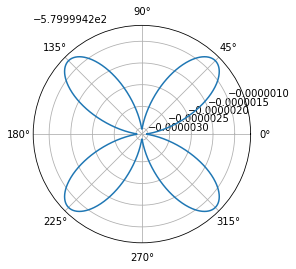

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

alpha = np.linspace(0,2*np.pi, 360*4)

dx = 1.
dt = 0.001
c = 580.
f = 40.
k = 2*np.pi*f/c
w = c*k

def sin2(z):
    return (np.sin(z*k*dx/2))**2

c_num = (2/k*dt)*np.arcsin((c*dt/dx)*np.sqrt(sin2(np.cos(alpha)) + sin2(np.sin(alpha))))

#c_igel = (2/k*dt)*np.arcsin((c*dt/dx)**2*(np.sin(k*np.cos(alpha)*dx/2) + np.sin(k*np.sin(alpha)*dx/2)))

ax = plt.subplot(111, polar = True)

ax.plot(alpha, c_num-c)


plt.show()

### Comeback and understand it better

## Waves in a fault zone

In this part we want to address some particularities of a given model. More specifically,
we want to understand the propagation of a wave through a fault zone. The system is characterized
by $10x10 km^2$ area and the fault zone is in the middle of it with a width $\ell = 200m$. Now,
let's start setting some physical parameters of our problem.

In [28]:
c0 = 3000 # velocity in the background material
cf = 2250 # velocity in the fault zone
lx = 1e4 # length in x
lz = lx  # length in z
tseis = 3.5 # Seismogram length (in seconds) (gonna check later wahy this value)
f0 = 10 # dominant frequency observed in Hertz
fmax = 30 # maximum frequency  observed in Hertz
lambda_min = cf/fmax # minimum wavelength in meters
y_source = 5e3 # source location in why (in meters) (the depth)
lambda_dom = cf/f0 # dominant wavelength (225 meters)
# the latter tells us that we will need approximately 20 wavelengths to probe
# the entire distance from the source to the surface.
gp_pw = 20 # grid points per wavelength
dx = lambda_dom/gp_pw
dz = dx
nx = lx/dx
print ("We need approximately %.2f" % nx, "gridpoints squared\n")

total_space_field = 6 # total field at a given time pxnew, pxold, px, pznew, pzold and pz.
dpn = 8 #in bytes, double precision number
total_mem = (nx**2)*total_space_field*dpn/1e6 #total memory used in MB
print ("We nned approximately %.2f" % total_mem, "MB of memory to run the entire simmulation.")

We need approximately 888.89 gridpoints squared

We nned approximately 37.93 MB of memory to run the entire simmulation.


The time increment is given by the Courant criterion. That tells us that

\begin{equation}
    c_{max}\frac{dt}{dx} < \epsilon\,,
\end{equation}
choosing $\epsilon = 0.7$ we have

In [49]:
dt = 0.7*dx/c0 # time step
print ('The timestep dt = %.4f' % dt, "\n")
nt = tseis/dt #number of grid points in time
print ('The number of grid points in time is nt = %.2f' % nt)

The timestep dt = 0.0026 

The number of grid points in time is nt = 1333.33


The boundary condition of the problem, we can assume that it is a 
perfectly reflecting case, where the pressure is zero at the boundary.

**Extremely** nice plots. Gonna do some on a new notebook.

 ## Elastic Wave Equation – Staggered Grids
 
 So far we have studied the scalar wave equation, but now we are going
 to check the elastic wave equation. The latter describes the motion
 perpendicular to the direction of propagation.
 
 For the general case, the elastic wave equation is given by

\begin{equation}
    \rho \partial_t^2u_y(x,t) = \partial_x\big(\mu(x)\partial_xu_y(x,t)\big)\,.
\end{equation}

If the homogeneous case is considered and the shear modulus is constant in
the entire domain, the equation reads

\begin{equation}
    \partial_t^2u_y(x,t) = \frac{\mu}{\rho}\partial_x^2\partial_xu_y(x,t)\,,\quad \text{with } c^2 = \frac{\mu}{\rho}\,.
\end{equation}
and we have a full correspondence between to what we have done so far.

What does happen when the shear modulus is $\mu = \mu(x)$? How does
the finite difference method look like?

A way of answering this question is the following: *the quantity $\sigma = \mu(x)\partial_xu(x,t)$
is the stress, of the string, for instance. Taking into consideration the velocity $v=\partial_tu$
one can convert the second derivative PDE into a first order one*

\begin{align}
    \rho\partial_tv &= \partial_x\sigma\,,\\
    \partial_t\sigma &= \partial_xv\,.
\end{align}
The latter is obtained directly from the equation from the strain.
These couple equations constitute what is called *the velocity-stress
formulation of the elastic wave equation*.

With these coupled equations, there is a better way to obtain to
discretize the space known as "staggered grids". In the staggered grid
scheme, the calculation for the function is done at certain points, say
$f(x+dx)$ and $f(x-dx)$, whereas it is derivative are known at points
$f(x+dx/2)$ and $f(x-dx/2)$, for example.

One of the advantages is that the grid spacing is $dx$, instead of $2dx$.

Let's start by the equation for the spatial derivative of the stress.
Suppose that we are looking at the stress at the position at the spatial
point $i$ and time $j$. Therefore, we are going to have
\begin{equation}
    \partial_x\sigma_i^j  \simeq \frac{\sigma^j_{i+1/2} - \sigma^j_{i-1/2}}{dx}\,,
\end{equation}
for the time derivative of the velocity field at the point $j$ at time $i$ one has
\begin{equation}
    \partial_tv_i^j \simeq \frac{v_i^{j+1/2} - v_i^{j-1/2}}{dt}\,.
\end{equation}

Using both equation above, the full equation involving these two quantities is

\begin{equation}
    \frac{v_i^{j+1/2} - v_i^{j-1/2}}{dt} = \frac{1}{\rho_i}\frac{\sigma^j_{i+1/2} - \sigma^j_{i-1/2}}{dx}\,.
\end{equation}

If we follow the same line of reasoning for the remaining equation and using the forward derivative,
we obtain the following

\begin{equation}
    \frac{\sigma_{i+1/2}^{j+1} - \sigma_{i+1/2}^{j}}{dt} =\mu_{i+1/2}\frac{v^{j+1/2}_{i+1} - v^{j+1/2}_{i}}{dx}\,.
\end{equation}

## Improving numerical accuracy

Most of subjects/techniques that we have discussed so far were
related to improving the accuracy related to the spatial derivatives.
The time derivative play a minor role, in the sense that we simply put
it aside and obtain the field at a posterior time by a extrapolation scheme.

What we are going to discuss is how to improve the accuracy for the
time derivative scheme and, consequently, the extrapolation scheme.

In an attempt to achieve so, we are going to analyse the so called
*advection equation*, given below

\begin{equation}
    \partial_tq(x,t) = c\partial_xq(x,t)\,.
\end{equation}

To what concerns solving the above equation, we would simply use the
time extrapolation scheme, Euler method and we would do the following

\begin{equation}
    q^{+}(x,t +dt) = cdt \partial_xq(x,t) + q(x,t)\,.
\end{equation}
We set an upper plus sign to this scheme, to identify the one used.
However, this method is not as accurete as other methods, like the
*Predictor-corrector scheme*.